Starting Notebook for playing with OpenAI Environments
======================================================
Basic starter notebook for playing with the states, actions, and rewards for the OpenAI Gym classic control environments.

# Install OpenAI Gym

In [1]:
!pip install gym

     ------------------------------------- 721.7/721.7 kB 22.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827631 sha256=8381062a1558112ee1ae2ffef1b0dfcc4204ce814f6e7bfc59f2775f50c465cd
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\17\79\65\7afedc162d858b02708a3b8f7a6dd5b1000dcd5b0f894f7cc1
Successfully built gym



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Minimal install, if on CoLab
If you are running this locally on your laptop or desktop, then you may not need the below, but I need the below to get this to run on a remote server on CoLab (it is mostly to handle the lack of a "display" on a remote server).

In [2]:
!apt install xvfb -y
!pip install pyvirtualdisplay

'apt' is not recognized as an internal or external command,
operable program or batch file.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Creates a virtual display in CoLab. May not be necessary if locally installed.
#from pyvirtualdisplay import Display
#display = Display(visible=0, size=(1400, 900))
#display.start()

FileNotFoundError: [WinError 2] The system cannot find the file specified

# Now for Actually Exploring Gym
If installed correctly, then the below is how you use it to explore various aspects of the RL Acrobot Environment.

In [4]:
%matplotlib inline
import gym
import numpy as np
# For Plotting:
import matplotlib
import matplotlib.pyplot as plt
# If you want degrees or radians:
import math
# If you want to randomize the states or actions:
import random

Example of Basic loading and plotting in the default state:

Starting in: [ 0.03075279 -0.0271158   0.06758116 -0.03381797]


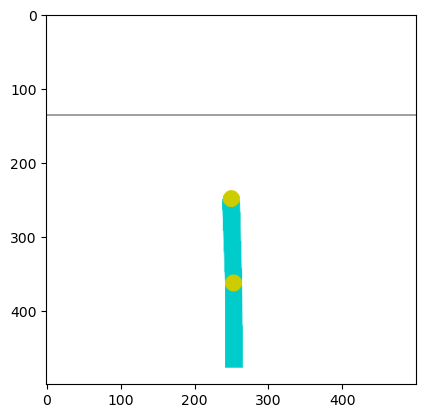

In [8]:
env = gym.make('Acrobot-v1', render_mode = "rgb_array")
# Need to reset the environment to initialize it
# Resets it to a random configuration hanging down
env.reset()
# The State
# Array is: [top_theta (in rads),         bottom_theta (in_rads),
#            top_theta_dot (in rads/sec), bottom_theta_dot (in_rads/sec)]
print("Starting in:", env.env.state)
plt.imshow(env.render())

Example of modifying the initial (reset) state to put the robot into a new state (just for testing/visualization purposes). Normally you would not be able to manipulate the state directly (you could also do this through taking actions). But, for exploring the reward function or actions, this might be useful.

In [13]:
# Now you can set the initial state of the system, if you want to play with it
# Array is: [top_theta (in rads),         bottom_theta (in_rads),
#            top_theta_dot (in rads/sec), bottom_theta_dot (in_rads/sec)]
# Quick ref: 90 degs = 1.57 rads
## Change the below:
env.state = [1.57*2, 1.57, 0.0, 0.0]
# Alternatively, if you prefer degrees
# env.env.state = [math.radians(90)*2, math.radians(90), 0.0, 0.0]

print("Starting in:", env.env.state)
plt.imshow(env.render())

Starting in: [0.5, 0, 0.0, 0.0]


Example of investigating the "before" and "after" of taking various actions. You can use this to get a sense of what different actions do to the system.

Starting in: [0.5, 0, 0.0, 0.0]


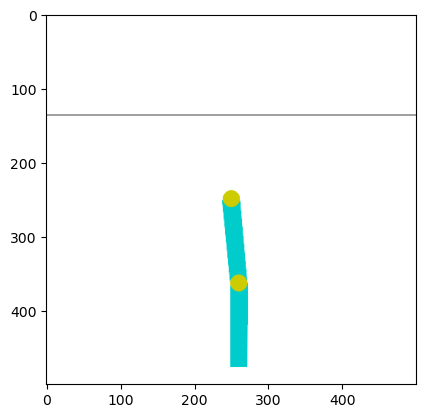

In [12]:
# Before
env.env.state = [0.5, 0, 0.0, 0.0]
# Alternatively, if you prefer degrees
# env.env.state = [math.radians(90)*2, math.radians(90), 0.0, 0.0]

print("Starting in:", env.env.state)
plt.imshow(env.render())

Taking Action: 0
Observation: [ 0.94602702  0.32408775  0.99954791  0.03006626 -0.78265852  0.08899949]
New State: [ 0.33004728  0.03007079 -0.78265852  0.08899949]
Reward: -1.0
Done: False
Info: {}
After:


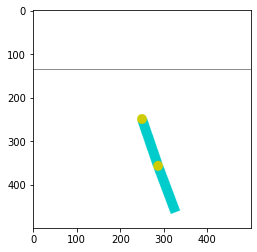

In [ ]:
## Change the below to see the effect of actions:
action = 0
print("Taking Action:", action)
env.step(action) # Can be -1, 0, or +1

# Now we compute the "after" of taking that action:
observation, reward, done, info = env.step(action)
# Note that the observation provided by env.step is a little different than
# the input state:
# Input was: Angle 1, Angle 2, Ang_Vel 1, Ang_Vel 2
# But observation returns:
# Output is: ([cos(Ang.1), sin(Ang.1), 
#              cos(Ang.2), sin(Ang.2), 
#              Ang_Vel 1, Ang_Vel 2])
print("Observation:", observation)
# Compare the above with the below to see what I mean:
print("New State:", env.env.state)
# This allows you to see the "reward" of the new state in "observation"
print("Reward:", reward)
print("Done:", done)
# For Acrobot, the Info part will always be empty. You can ignore it.
# In other environments, there might be other things in here.
print("Info:", info)

print("After:")
plt.imshow(env.render('rgb_array'))
#env.render()

## Re-Running this cell should step through subsequent timesteps

In [ ]:
#